In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
selected_columns = [
    'bant_submit', 'customer_country', 'business_unit', 'com_reg_ver_win_rate',
    'customer_idx', 'customer_type', 'enterprise', 'historical_existing_cnt',
    'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver', 'customer_job',
    'lead_desc_length', 'inquiry_type', 'product_category', 'product_subcategory',
    'product_modelname', 'customer_country.1', 'customer_position',
    'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro',
    'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area', 'business_subarea',
    'lead_owner'
]

In [5]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
train_file_path = '/content/drive/MyDrive/LGdata/train.csv'

df = pd.read_csv(train_file_path)

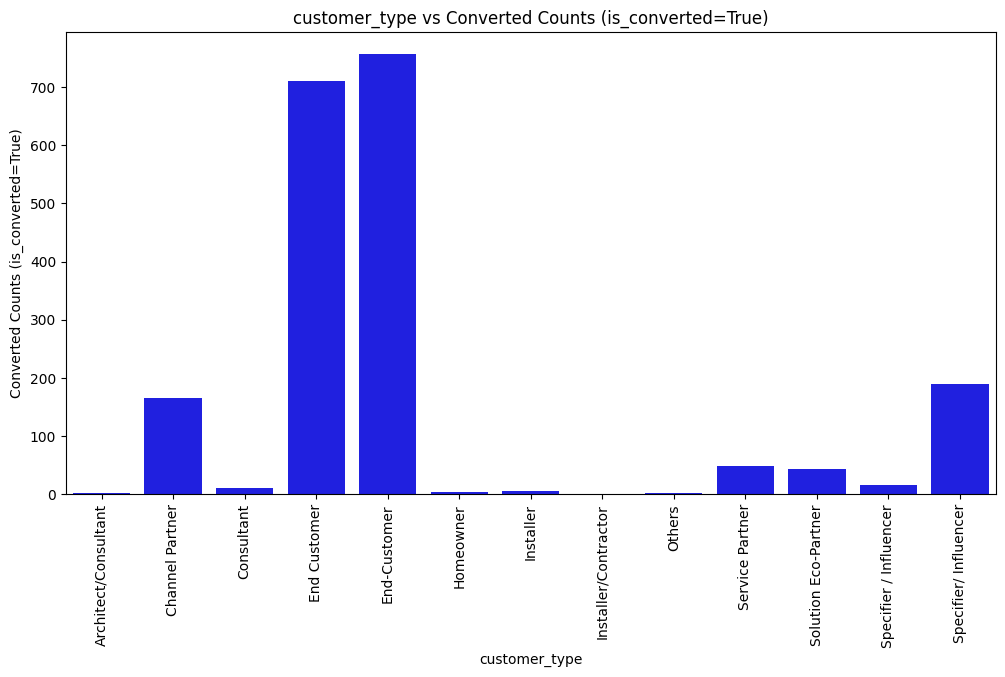

In [13]:
converted_counts = df.groupby('customer_type')['is_converted'].sum().reset_index()
converted_counts_non_zero = converted_counts[converted_counts['is_converted'] > 0]

plt.figure(figsize=(12, 6))
sns.barplot(x='customer_type', y='is_converted', data=converted_counts_non_zero, color='blue')
plt.title('customer_type vs Converted Counts (is_converted=True)')
plt.xlabel('customer_type')
plt.ylabel('Converted Counts (is_converted=True)')
plt.xticks(rotation='vertical')

plt.show()